# Coursera Capstone Project

### Importing all libraries:

In [1]:
!pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [20]:
pd.set_option('display.max_columns',500)

In [2]:
df = pd.read_excel('D://Coursera DS//9. Applied Data Science Capstone//Week 4//4. Final-Pune Data All.xlsx')

In [3]:
df.head(10)

,Borough,Neighbourhoods,Latitude,Longitude,Population,City,Average Income
0,Pune Municipal Corporation,Ambegaon,19.144350,73.729103,54791,Pune,21554.136889
1,Pune Municipal Corporation,Aundh,18.558130,73.807281,17899,Pune,14995.002708
2,Pune Municipal Corporation,Baner,18.562120,73.802544,84725,Pune,29959.393522
3,Pune Municipal Corporation,Bavdhan Khurd,18.472270,73.884640,83399,Pune,14971.799874
4,Pune Municipal Corporation,Bavdhan Budruk,18.456620,73.844100,24639,Pune,14986.677169
5,Pune Municipal Corporation,Balewadi,18.574739,73.770889,25542,Pune,14927.853254
6,Pune Municipal Corporation,Shivajinagar,18.526110,73.844131,51600,Pune,14992.906561
7,Pune Municipal Corporation,Bibvewadi,18.483370,73.855614,40332,Pune,14970.687088
8,Pune Municipal Corporation,Bhugaon,18.488890,73.741562,23005,Pune,14914.758979
9,Pune Municipal Corporation,Bhukum,18.498380,73.719390,37229,Pune,14993.989437


#### Creating 'Population' and 'Income' dataframe from the main dataframe

In [4]:
pune_population = pd.DataFrame(df[['Borough','Neighbourhoods','Population']])

In [5]:
pune_population.head(10)

,Borough,Neighbourhoods,Population
0,Pune Municipal Corporation,Ambegaon,54791
1,Pune Municipal Corporation,Aundh,17899
2,Pune Municipal Corporation,Baner,84725
3,Pune Municipal Corporation,Bavdhan Khurd,83399
4,Pune Municipal Corporation,Bavdhan Budruk,24639
5,Pune Municipal Corporation,Balewadi,25542
6,Pune Municipal Corporation,Shivajinagar,51600
7,Pune Municipal Corporation,Bibvewadi,40332
8,Pune Municipal Corporation,Bhugaon,23005
9,Pune Municipal Corporation,Bhukum,37229


In [6]:
pune_income = pd.DataFrame(df[['Borough','Neighbourhoods','Average Income']])

In [7]:
pune_income.head(10)

,Borough,Neighbourhoods,Average Income
0,Pune Municipal Corporation,Ambegaon,21554.136889
1,Pune Municipal Corporation,Aundh,14995.002708
2,Pune Municipal Corporation,Baner,29959.393522
3,Pune Municipal Corporation,Bavdhan Khurd,14971.799874
4,Pune Municipal Corporation,Bavdhan Budruk,14986.677169
5,Pune Municipal Corporation,Balewadi,14927.853254
6,Pune Municipal Corporation,Shivajinagar,14992.906561
7,Pune Municipal Corporation,Bibvewadi,14970.687088
8,Pune Municipal Corporation,Bhugaon,14914.758979
9,Pune Municipal Corporation,Bhukum,14993.989437


#### Finding the latitude and longitude for Pune

In [8]:
pune_latitude = df['Latitude'].mean()
pune_longitude = df['Longitude'].mean()
print("Latitude and Longitude of pune are : ",pune_latitude,pune_longitude)

Latitude and Longitude of pune are :  18.55996399019608 73.82738404901961


In [9]:
CLIENT_ID = '5H1FNHYQ0JV53WP45HRSFBENXT5VGSO3XHPC0NCRTSAGTFS4' # Foursquare ID
CLIENT_SECRET = 'W4NRDHBOCH43JRT3KOG1C32DE0EJOBDRIH31D1D23BNRO1WA' # Foursquare Secret
VERSION = '20200715' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5H1FNHYQ0JV53WP45HRSFBENXT5VGSO3XHPC0NCRTSAGTFS4
CLIENT_SECRET:W4NRDHBOCH43JRT3KOG1C32DE0EJOBDRIH31D1D23BNRO1WA


In [10]:
CLIENT_ID = '5H1FNHYQ0JV53WP45HRSFBENXT5VGSO3XHPC0NCRTSAGTFS4'
CLIENT_SECRET = 'W4NRDHBOCH43JRT3KOG1C32DE0EJOBDRIH31D1D23BNRO1WA'
VERSION = '20200715'
LIMIT = 150

In [11]:
unique_boroughs_of_pune = df['Borough'].unique().tolist()

In [12]:
unique_boroughs_of_pune

['Pune Municipal Corporation',
 'Pimpri-Chinchwad Municipal Corporation',
 'Vadgaon',
 'Cantonment areas',
 'Old city']

In [13]:
borough_colors ={}
for i in unique_boroughs_of_pune:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [14]:
borough_colors

{'Pune Municipal Corporation': '#E09410',
 'Pimpri-Chinchwad Municipal Corporation': '#AA1DD5',
 'Vadgaon': '#E5B395',
 'Cantonment areas': '#2BEE42',
 'Old city': '#349137'}

In [15]:
pune_map = folium.Map(location=[pune_latitude,pune_longitude],zoom_start=12,control_scale=True)

In [16]:
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighbourhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(pune_map)

In [49]:
pune_map

## Exploring bangalore Neighborhoods using FourSquare AP

In [17]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION,
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhoods',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [19]:
pune_venues = getNearbyVenues(names=df['Neighbourhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Ambegaon
Fetching venues for :  Aundh
Fetching venues for :  Baner
Fetching venues for :  Bavdhan Khurd
Fetching venues for :  Bavdhan Budruk
Fetching venues for :  Balewadi
Fetching venues for :  Shivajinagar
Fetching venues for :  Bibvewadi
Fetching venues for :  Bhugaon
Fetching venues for :  Bhukum
Fetching venues for :  Dhankawadi
Fetching venues for :  Dhanori
Fetching venues for :  Dhayari
Fetching venues for :  Erandwane
Fetching venues for :  Fursungi
Fetching venues for :  Ghorpadi
Fetching venues for :  Hadapsar
Fetching venues for :  Hingne Khurd
Fetching venues for :  Karve Nagar
Fetching venues for :  Kalas
Fetching venues for :  Katraj
Fetching venues for :  Khadki
Fetching venues for :  Kharadi
Fetching venues for :  Kondhwa
Fetching venues for :  Koregaon Park
Fetching venues for :  Kothrud
Fetching venues for :  Manjri
Fetching venues for :  Markal
Fetching venues for :  Mohammed Wadi
Fetching venues for :  Mundhwa
Fetching venues for :  Nanded


### Finding total number of venues

In [21]:
print("Total number of venues found in Pune are : ",pune_venues.shape[0])

Total number of venues found in Pune are :  506


In [22]:
pune_venues.head(5)

,Neighbourhoods,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aundh,Pune Municipal Corporation,18.55813,73.807281,Starbucks,18.556595,73.809153,Coffee Shop
1,Aundh,Pune Municipal Corporation,18.55813,73.807281,Crosswords,18.556177,73.809131,Bookstore
2,Aundh,Pune Municipal Corporation,18.55813,73.807281,Naturals Icecream,18.556192,73.809169,Ice Cream Shop
3,Aundh,Pune Municipal Corporation,18.55813,73.807281,Taareef,18.556077,73.809120,Indian Restaurant
4,Aundh,Pune Municipal Corporation,18.55813,73.807281,Westend mall,18.561814,73.807220,Shopping Mall


### Grouping the venues

In [23]:
pune_venues.groupby('Venue Category').count()['Neighbourhoods'].sort_values(ascending=False).head(10)

Venue Category
Indian Restaurant    74
Snack Place          23
Café                 17
Ice Cream Shop       16
Bakery               16
Dessert Shop         16
ATM                  15
Coffee Shop          14
Sandwich Place       13
Restaurant           12
Name: Neighbourhoods, dtype: int64

In [24]:
print("Total number of unique categories in pune are: ",len(pune_venues['Venue Category'].unique()))

Total number of unique categories in pune are:  106


### Getting number of venues per neighborhood

In [25]:
individual_pune_venue_count = pune_venues.groupby(['Borough','Neighbourhoods'])['Borough'].count().to_frame()

In [26]:
individual_pune_venue_count

Borough
Borough                    Neighbourhoods            
Cantonment areas           Dehu Road                2
                           Khadki Cantonment        2
                           Pune Cantonment          2
Old city                   Bhavani Peth             6
                           Budhwar Peth            13
...                                               ...
Pune Municipal Corporation Yerwada                  3
Vadgaon                    Parandwadi               1
                           Somatne                  2
                           Talegaon                 4
                           Vadgaon Maval            2

[80 rows x 1 columns]

### Count of venues per Borough

In [27]:
individual_pune_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)

In [28]:
individual_pune_venue_count.reset_index(inplace=True)

In [29]:
individual_pune_venue_count

,Borough,Neighbourhoods,NumberOfVenues
0,Cantonment areas,Dehu Road,2
1,Cantonment areas,Khadki Cantonment,2
2,Cantonment areas,Pune Cantonment,2
3,Old city,Bhavani Peth,6
4,Old city,Budhwar Peth,13
...,...,...,...
75,Pune Municipal Corporation,Yerwada,3
76,Vadgaon,Parandwadi,1
77,Vadgaon,Somatne,2
78,Vadgaon,Talegaon,4


# Plot

[Text(0, 0, 'Dehu Road'),
 Text(0, 0, 'Khadki\xa0Cantonment'),
 Text(0, 0, 'Pune Cantonment'),
 Text(0, 0, 'Bhavani Peth'),
 Text(0, 0, 'Budhwar Peth'),
 Text(0, 0, 'Ganesh Peth'),
 Text(0, 0, 'Ghorpade Peth'),
 Text(0, 0, 'Guruwar Peth'),
 Text(0, 0, 'Kasba Peth'),
 Text(0, 0, 'Mahatma Phule Peth'),
 Text(0, 0, 'Mangalwar Peth'),
 Text(0, 0, 'Nana Peth'),
 Text(0, 0, 'Narayan Peth'),
 Text(0, 0, 'Navi Peth'),
 Text(0, 0, 'Rasta Peth'),
 Text(0, 0, 'Raviwar Peth'),
 Text(0, 0, 'Sadashiv Peth'),
 Text(0, 0, 'Shaniwar Peth'),
 Text(0, 0, 'Shukrawar Peth'),
 Text(0, 0, 'Somwar Peth'),
 Text(0, 0, 'Akurdi'),
 Text(0, 0, 'Bhosari'),
 Text(0, 0, 'Chinchwad'),
 Text(0, 0, 'Dapodi'),
 Text(0, 0, 'Dehu Road'),
 Text(0, 0, 'Dighi'),
 Text(0, 0, 'Dudulgaon'),
 Text(0, 0, 'Hinjawadi'),
 Text(0, 0, 'Kalewadi'),
 Text(0, 0, 'Kasarwadi'),
 Text(0, 0, 'Phugewadi'),
 Text(0, 0, 'Pimple Gurav'),
 Text(0, 0, 'Pimple Nilakh'),
 Text(0, 0, 'Pimple Saudagar'),
 Text(0, 0, 'Pimpri'),
 Text(0, 0, 'Rahatani'),

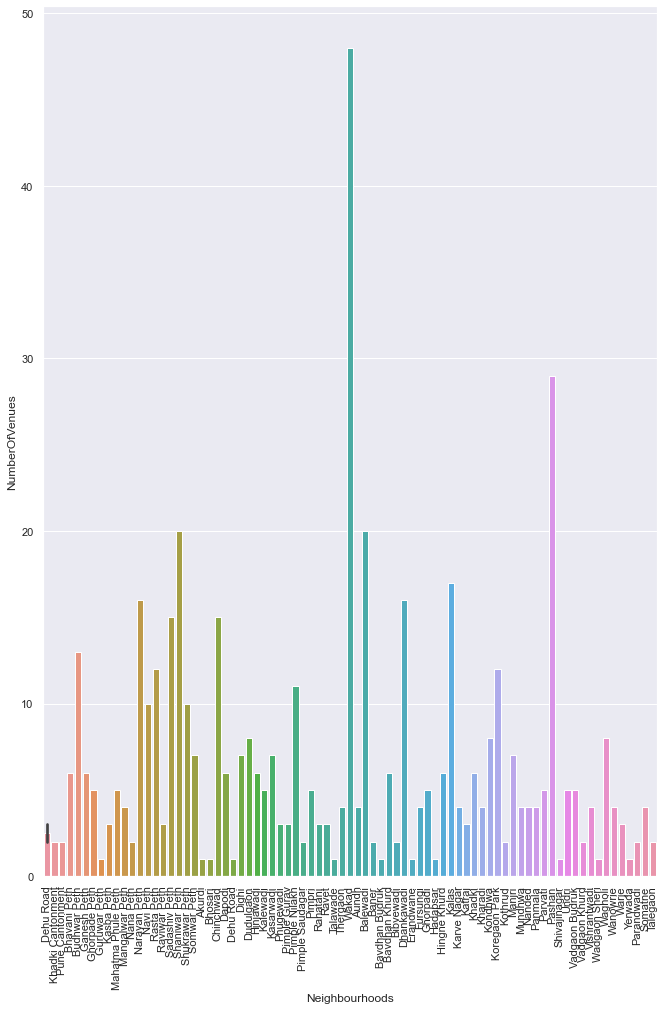

In [30]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighbourhoods',y='NumberOfVenues',data=individual_pune_venue_count)
plot.set_xticklabels(individual_pune_venue_count['Neighbourhoods'],rotation=90)

### Exploring Hinjawadi venues

In [32]:
pune_venues[pune_venues['Neighbourhoods']=='Hinjawadi']

,Neighbourhoods,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
292,Hinjawadi,Pimpri-Chinchwad Municipal Corporation,18.597059,73.718826,Punjabi Rasoi,18.597059,73.719575,Indian Restaurant
293,Hinjawadi,Pimpri-Chinchwad Municipal Corporation,18.597059,73.718826,Domino's Pizza,18.597000,73.719000,Pizza Place
294,Hinjawadi,Pimpri-Chinchwad Municipal Corporation,18.597059,73.718826,Domino's Pizza,18.597050,73.714900,Pizza Place
295,Hinjawadi,Pimpri-Chinchwad Municipal Corporation,18.597059,73.718826,Domino's Pizza,18.597000,73.715000,Pizza Place
296,Hinjawadi,Pimpri-Chinchwad Municipal Corporation,18.597059,73.718826,Absolute Barbeque's - AB's,18.597060,73.718830,BBQ Joint
297,Hinjawadi,Pimpri-Chinchwad Municipal Corporation,18.597059,73.718826,Mauli Snacks Center,18.596714,73.719268,Coffee Shop
298,Hinjawadi,Pimpri-Chinchwad Municipal Corporation,18.597059,73.718826,Subway,18.599117,73.719137,Sandwich Place
299,Hinjawadi,Pimpri-Chinchwad Municipal Corporation,18.597059,73.718826,Wipro phase 2 cafeteria,18.599475,73.718924,Food Court


### One hot encoding for letting us to compare different venues based on some common scale

In [33]:
pune_venues_onehot = pd.get_dummies(pune_venues[['Venue Category']])

In [34]:
pune_venues_onehot

,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Workshop,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Baseball Stadium,Venue Category_Bed & Breakfast,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,Venue Category_Burrito Place,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Café,Venue Category_Chaat Place,Venue Category_Chinese Restaurant,Venue Category_Clothing Store,Venue Category_Coffee Shop,Venue Category_Comfort Food Restaurant,Venue Category_Concert Hall,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Cupcake Shop,Venue Category_Dance Studio,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Drugstore,Venue Category_Dumpling Restaurant,Venue Category_Electronics Store,Venue Category_Fast Food Restaurant,Venue Category_Flea Market,Venue Category_Food & Drink Shop,Venue Category_Food Court,Venue Category_Food Truck,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Fruit & Vegetable Store,Venue Category_Furniture / Home Store,Venue Category_Garden,Venue Category_Garden Center,Venue Category_Gym,Venue Category_Gym / Fitness Center,Venue Category_Historic Site,Venue Category_History Museum,Venue Category_Hockey Field,Venue Category_Hookah Bar,Venue Category_Hostel,Venue Category_Hotel,Venue Category_Hotel Bar,Venue Category_Hyderabadi Restaurant,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Indian Sweet Shop,Venue Category_Intersection,Venue Category_Italian Restaurant,Venue Category_Jewelry Store,Venue Category_Juice Bar,Venue Category_Kids Store,Venue Category_Lake,Venue Category_Lounge,Venue Category_Maharashtrian Restaurant,Venue Category_Market,Venue Category_Men's Store,Venue Category_Middle Eastern Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Mountain,Venue Category_Multicuisine Indian Restaurant,Venue Category_Multiplex,Venue Category_Performing Arts Venue,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Platform,Venue Category_Playground,Venue Category_Plaza,Venue Category_Pub,Venue Category_Punjabi Restaurant,Venue Category_Restaurant,Venue Category_River,Venue Category_Road,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shoe Store,Venue Category_Shop & Service,Venue Category_Shopping Mall,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Sports Bar,Venue Category_Stadium,Venue Category_Tea Room,Venue Category_Thai Restaurant,Venue Category_Theater,Venue Category_Trail,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Wine Shop,Venue Category_Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [35]:
pune_venues_onehot['Neighbourhoods'] = pune_venues['Neighbourhoods']
pune_venues_grouped = pune_venues_onehot.groupby('Neighbourhoods').mean().reset_index()
pune_venues_grouped

,Neighbourhoods,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Workshop,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Baseball Stadium,Venue Category_Bed & Breakfast,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,Venue Category_Burrito Place,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Café,Venue Category_Chaat Place,Venue Category_Chinese Restaurant,Venue Category_Clothing Store,Venue Category_Coffee Shop,Venue Category_Comfort Food Restaurant,Venue Category_Concert Hall,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Cupcake Shop,Venue Category_Dance Studio,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Drugstore,Venue Category_Dumpling Restaurant,Venue Category_Electronics Store,Venue Category_Fast Food Restaurant,Venue Category_Flea Market,Venue Category_Food & Drink Shop,Venue Category_Food Court,Venue Category_Food Truck,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Fruit & Vegetable Store,Venue Category_Furniture / Home Store,Venue Category_Garden,Venue Category_Garden Center,Venue Category_Gym,Venue Category_Gym / Fitness Center,Venue Category_Historic Site,Venue Category_History Museum,Venue Category_Hockey Field,Venue Category_Hookah Bar,Venue Category_Hostel,Venue Category_Hotel,Venue Category_Hotel Bar,Venue Category_Hyderabadi Restaurant,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Indian Sweet Shop,Venue Category_Intersection,Venue Category_Italian Restaurant,Venue Category_Jewelry Store,Venue Category_Juice Bar,Venue Category_Kids Store,Venue Category_Lake,Venue Category_Lounge,Venue Category_Maharashtrian Restaurant,Venue Category_Market,Venue Category_Men's Store,Venue Category_Middle Eastern Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Mountain,Venue Category_Multicuisine Indian Restaurant,Venue Category_Multiplex,Venue Category_Performing Arts Venue,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Platform,Venue Category_Playground,Venue Category_Plaza,Venue Category_Pub,Venue Category_Punjabi Restaurant,Venue Category_Restaurant,Venue Category_River,Venue Category_Road,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shoe Store,Venue Category_Shop & Service,Venue Category_Shopping Mall,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Sports Bar,Venue Category_Stadium,Venue Category_Tea Room,Venue Category_Thai Restaurant,Venue Category_Theater,Venue Category_Trail,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Wine Shop,Venue Category_Women's Store
0,Akurdi,0.0,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,Aundh,0.0,0.020833,0.0,0.00,0.0,0.0,0.020833,0.0625,0.0,0.0,0.0,0.0,0.0,0.020833,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.0,0.000000,0.020833,0.0625,0.0,0.0,0.0,0.020833,0.0,0.000,0.0,0.104167,0.020833,0.020833,0.0,0.020833,0.0,0.020833,0.0,0.0,0.0,0.020833,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0.020833,0.0,0.0,0.041667,0.166667,0.0,0.0,0.00,0.0,0.020833,0

In [36]:
number_of_top_venues = 5

In [37]:
for hood in pune_venues_grouped['Neighbourhoods']:
    print('---------',hood,'---------')
    temp = pune_venues_grouped[pune_venues_grouped['Neighbourhoods'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Akurdi ---------
                                           Venue  Frequency
0                     Venue Category_Snack Place        1.0
1                      Venue Category_Kids Store        0.0
2           Venue Category_Performing Arts Venue        0.0
3                       Venue Category_Multiplex        0.0
4  Venue Category_Multicuisine Indian Restaurant        0.0


--------- Aundh ---------
                              Venue  Frequency
0  Venue Category_Indian Restaurant       0.17
1       Venue Category_Dessert Shop       0.10
2        Venue Category_Coffee Shop       0.06
3             Venue Category_Bakery       0.06
4         Venue Category_Restaurant       0.06


--------- Balewadi ---------
                              Venue  Frequency
0   Venue Category_Asian Restaurant       0.25
1  Venue Category_Indian Restaurant       0.25
2         Venue Category_Restaurant       0.25
3           Venue Category_Tea Room       0.25
4                Venue Category_ATM  

### Frequency of each neighborhood and its top 5 venues.

In [38]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [39]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhoods']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhoods'] = pune_venues_grouped['Neighbourhoods']

for ind in np.arange(pune_venues_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(pune_venues_grouped.iloc[ind, :], number_of_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Akurdi,Venue Category_Snack Place,Venue Category_Women's Store,Venue Category_Fast Food Restaurant,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Cupcake Shop,Venue Category_Dance Studio,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner
1,Aundh,Venue Category_Indian Restaurant,Venue Category_Dessert Shop,Venue Category_Bakery,Venue Category_Coffee Shop,Venue Category_Restaurant,Venue Category_Ice Cream Shop,Venue Category_Shopping Mall,Venue Category_Middle Eastern Restaurant,Venue Category_Clothing Store,Venue Category_Multiplex
2,Balewadi,Venue Category_Asian Restaurant,Venue Category_Tea Room,Venue Category_Restaurant,Venue Category_Indian Restaurant,Venue Category_Women's Store,Venue Category_Electronics Store,Venue Category_Cosmetics Shop,Venue Category_Cupcake Shop,Venue Category_Dance Studio,Venue Category_Department Store
3,Baner,Venue Category_Dessert Shop,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Multiplex,Venue Category_Snack Place,Venue Category_Middle Eastern Restaurant,Venue Category_Chinese Restaurant,Venue Category_Italian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Restaurant
4,Bavdhan Budruk,Venue Category_ATM,Venue Category_Café,Venue Category_Fast Food Restaurant,Venue Category_Cosmetics Shop,Venue Category_Cupcake Shop,Venue Category_Dance Studio,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Donut Shop


In [40]:
neighbourhoods_venues_sorted.shape

(79, 11)

### Finding the optimal k value for clustering using the elbow method

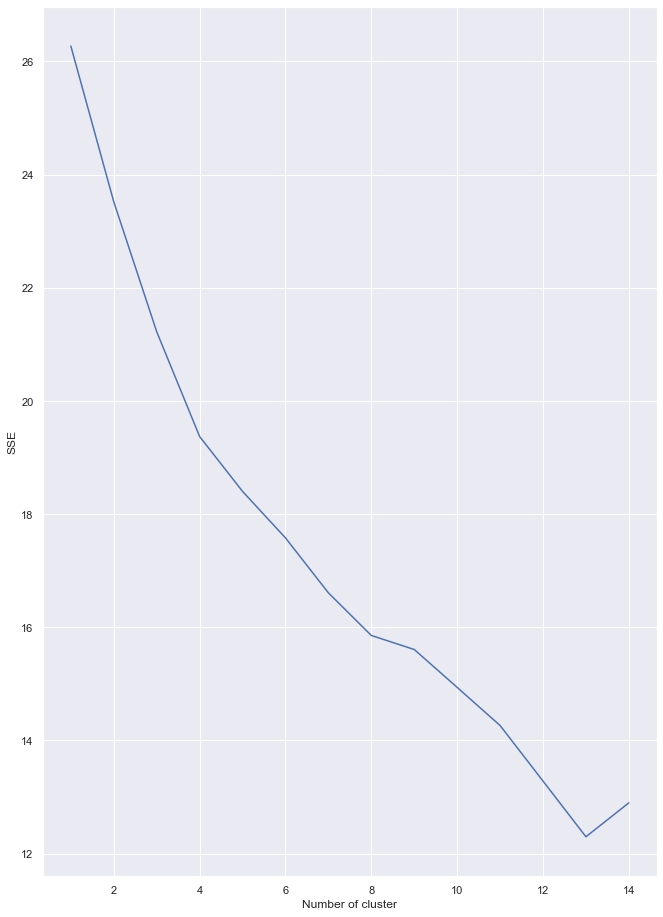

In [41]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(pune_venues_grouped.drop('Neighbourhoods',axis=1))
    pune_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

#### The optimal value for cluster is 5 from the graph

In [42]:
kmeans = KMeans(n_clusters=8,random_state=0)

In [43]:
kmeans.fit(pune_venues_grouped.drop('Neighbourhoods',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [44]:
pune_venues_grouped['Cluster'] = kmeans.labels_

In [45]:
pune_venues_grouped.groupby('Cluster')['Neighbourhoods'].count()

Cluster
0     2
1    22
2    23
3     7
4     5
5     8
6     7
7     5
Name: Neighbourhoods, dtype: int64

In [46]:
pune_venues_grouped.columns

Index(['Neighbourhoods', 'Venue Category_ATM',
       'Venue Category_Accessories Store',
       'Venue Category_Arts & Crafts Store', 'Venue Category_Asian Restaurant',
       'Venue Category_Athletics & Sports', 'Venue Category_Auto Workshop',
       'Venue Category_BBQ Joint', 'Venue Category_Bakery',
       'Venue Category_Bank',
       ...
       'Venue Category_Tea Room', 'Venue Category_Thai Restaurant',
       'Venue Category_Theater', 'Venue Category_Trail',
       'Venue Category_Train Station', 'Venue Category_Travel & Transport',
       'Venue Category_Vegetarian / Vegan Restaurant',
       'Venue Category_Wine Shop', 'Venue Category_Women's Store', 'Cluster'],
      dtype='object', length=108)

In [47]:
neighbourhoods_venues_sorted = neighbourhoods_venues_sorted.merge(pune_venues_grouped,on='Neighbourhoods')

In [48]:
neighbourhoods_venues_sorted.head(10)

,Neighbourhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Workshop,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Baseball Stadium,Venue Category_Bed & Breakfast,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,Venue Category_Burrito Place,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Café,Venue Category_Chaat Place,Venue Category_Chinese Restaurant,Venue Category_Clothing Store,Venue Category_Coffee Shop,Venue Category_Comfort Food Restaurant,Venue Category_Concert Hall,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Cupcake Shop,Venue Category_Dance Studio,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Drugstore,Venue Category_Dumpling Restaurant,Venue Category_Electronics Store,Venue Category_Fast Food Restaurant,Venue Category_Flea Market,Venue Category_Food & Drink Shop,Venue Category_Food Court,Venue Category_Food Truck,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Fruit & Vegetable Store,Venue Category_Furniture / Home Store,Venue Category_Garden,Venue Category_Garden Center,Venue Category_Gym,Venue Category_Gym / Fitness Center,Venue Category_Historic Site,Venue Category_History Museum,Venue Category_Hockey Field,Venue Category_Hookah Bar,Venue Category_Hostel,Venue Category_Hotel,Venue Category_Hotel Bar,Venue Category_Hyderabadi Restaurant,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Indian Sweet Shop,Venue Category_Intersection,Venue Category_Italian Restaurant,Venue Category_Jewelry Store,Venue Category_Juice Bar,Venue Category_Kids Store,Venue Category_Lake,Venue Category_Lounge,Venue Category_Maharashtrian Restaurant,Venue Category_Market,Venue Category_Men's Store,Venue Category_Middle Eastern Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Mountain,Venue Category_Multicuisine Indian Restaurant,Venue Category_Multiplex,Venue Category_Performing Arts Venue,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Platform,Venue Category_Playground,Venue Category_Plaza,Venue Category_Pub,Venue Category_Punjabi Restaurant,Venue Category_Restaurant,Venue Category_River,Venue Category_Road,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shoe Store,Venue Category_Shop & Service,Venue Category_Shopping Mall,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Sports Bar,Venue Category_Stadium,Venue Category_Tea Room,Venue Category_Thai Restaurant,Venue Category_Theater,Venue Category_Trail,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Wine Shop,Venue Category_Women's Store,Cluster
0,Akurdi,Venue Category_Snack Place,Venue Category_Women's Store,Venue Category_Fast Food Restaurant,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Cupcake Shop,Venue Category_Dance Studio,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,

In [49]:
neighbourhoods_venues_sorted.columns
neighbourhoods_venues_sorted = neighbourhoods_venues_sorted.merge(pune_venues,on='Neighbourhoods')

In [50]:
neighbourhoods_venues_sorted.head()

,Neighbourhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Workshop,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Baseball Stadium,Venue Category_Bed & Breakfast,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,Venue Category_Burrito Place,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Café,Venue Category_Chaat Place,Venue Category_Chinese Restaurant,Venue Category_Clothing Store,Venue Category_Coffee Shop,Venue Category_Comfort Food Restaurant,Venue Category_Concert Hall,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Cupcake Shop,Venue Category_Dance Studio,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Drugstore,Venue Category_Dumpling Restaurant,Venue Category_Electronics Store,Venue Category_Fast Food Restaurant,Venue Category_Flea Market,Venue Category_Food & Drink Shop,Venue Category_Food Court,Venue Category_Food Truck,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Fruit & Vegetable Store,Venue Category_Furniture / Home Store,Venue Category_Garden,Venue Category_Garden Center,Venue Category_Gym,Venue Category_Gym / Fitness Center,Venue Category_Historic Site,Venue Category_History Museum,Venue Category_Hockey Field,Venue Category_Hookah Bar,Venue Category_Hostel,Venue Category_Hotel,Venue Category_Hotel Bar,Venue Category_Hyderabadi Restaurant,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Indian Sweet Shop,Venue Category_Intersection,Venue Category_Italian Restaurant,Venue Category_Jewelry Store,Venue Category_Juice Bar,Venue Category_Kids Store,Venue Category_Lake,Venue Category_Lounge,Venue Category_Maharashtrian Restaurant,Venue Category_Market,Venue Category_Men's Store,Venue Category_Middle Eastern Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Mountain,Venue Category_Multicuisine Indian Restaurant,Venue Category_Multiplex,Venue Category_Performing Arts Venue,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Platform,Venue Category_Playground,Venue Category_Plaza,Venue Category_Pub,Venue Category_Punjabi Restaurant,Venue Category_Restaurant,Venue Category_River,Venue Category_Road,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shoe Store,Venue Category_Shop & Service,Venue Category_Shopping Mall,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Sports Bar,Venue Category_Stadium,Venue Category_Tea Room,Venue Category_Thai Restaurant,Venue Category_Theater,Venue Category_Trail,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Wine Shop,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Akurdi,Venue Category_Snack Place,Venue Category_Women's Store,Venue Category_Fast Food Restaurant,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Cupcake Shop,Venue Category_Dance Studio,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0

In [51]:
# create map
map_clusters = folium.Map(location=[pune_latitude, pune_longitude], zoom_start=10)

In [52]:
# set color scheme for the clusters
x = np.arange(9)
ys = [i + x + (i*x)**2 for i in range(9)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighbourhoods_venues_sorted['Neighborhood Latitude'], neighbourhoods_venues_sorted['Neighborhood Longitude'], neighbourhoods_venues_sorted['Neighbourhoods'], neighbourhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [98]:
map_clusters

### Finding similar locations based on user input (Recommendation)

#### Analyzing factors such as population and Income to recommend

In [53]:
pune_income.head()

,Borough,Neighbourhoods,Average Income
0,Pune Municipal Corporation,Ambegaon,21554.136889
1,Pune Municipal Corporation,Aundh,14995.002708
2,Pune Municipal Corporation,Baner,29959.393522
3,Pune Municipal Corporation,Bavdhan Khurd,14971.799874
4,Pune Municipal Corporation,Bavdhan Budruk,14986.677169


In [54]:
pune_population.head()

,Borough,Neighbourhoods,Population
0,Pune Municipal Corporation,Ambegaon,54791
1,Pune Municipal Corporation,Aundh,17899
2,Pune Municipal Corporation,Baner,84725
3,Pune Municipal Corporation,Bavdhan Khurd,83399
4,Pune Municipal Corporation,Bavdhan Budruk,24639


In [57]:
pune_population['Normalized_population'] = pune_population['Population']/pune_population['Population'].max(axis=0)
pune_population.head()

,Borough,Neighbourhoods,Population,Normalized_population
0,Pune Municipal Corporation,Ambegaon,54791,0.646692
1,Pune Municipal Corporation,Aundh,17899,0.211260
2,Pune Municipal Corporation,Baner,84725,1.000000
3,Pune Municipal Corporation,Bavdhan Khurd,83399,0.984349
4,Pune Municipal Corporation,Bavdhan Budruk,24639,0.290811


In [58]:
pune_income['Normalized_income'] = pune_income['Average Income']/pune_income['Average Income'].max(axis=0)
pune_income.head()

,Borough,Neighbourhoods,Average Income,Normalized_income
0,Pune Municipal Corporation,Ambegaon,21554.136889,0.719445
1,Pune Municipal Corporation,Aundh,14995.002708,0.500511
2,Pune Municipal Corporation,Baner,29959.393522,1.000000
3,Pune Municipal Corporation,Bavdhan Khurd,14971.799874,0.499736
4,Pune Municipal Corporation,Bavdhan Budruk,14986.677169,0.500233


In [59]:
pune_venues_grouped.head(1)

,Neighbourhoods,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Workshop,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Baseball Stadium,Venue Category_Bed & Breakfast,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,Venue Category_Burrito Place,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Café,Venue Category_Chaat Place,Venue Category_Chinese Restaurant,Venue Category_Clothing Store,Venue Category_Coffee Shop,Venue Category_Comfort Food Restaurant,Venue Category_Concert Hall,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Cupcake Shop,Venue Category_Dance Studio,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Drugstore,Venue Category_Dumpling Restaurant,Venue Category_Electronics Store,Venue Category_Fast Food Restaurant,Venue Category_Flea Market,Venue Category_Food & Drink Shop,Venue Category_Food Court,Venue Category_Food Truck,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Fruit & Vegetable Store,Venue Category_Furniture / Home Store,Venue Category_Garden,Venue Category_Garden Center,Venue Category_Gym,Venue Category_Gym / Fitness Center,Venue Category_Historic Site,Venue Category_History Museum,Venue Category_Hockey Field,Venue Category_Hookah Bar,Venue Category_Hostel,Venue Category_Hotel,Venue Category_Hotel Bar,Venue Category_Hyderabadi Restaurant,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Indian Sweet Shop,Venue Category_Intersection,Venue Category_Italian Restaurant,Venue Category_Jewelry Store,Venue Category_Juice Bar,Venue Category_Kids Store,Venue Category_Lake,Venue Category_Lounge,Venue Category_Maharashtrian Restaurant,Venue Category_Market,Venue Category_Men's Store,Venue Category_Middle Eastern Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Mountain,Venue Category_Multicuisine Indian Restaurant,Venue Category_Multiplex,Venue Category_Performing Arts Venue,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Platform,Venue Category_Playground,Venue Category_Plaza,Venue Category_Pub,Venue Category_Punjabi Restaurant,Venue Category_Restaurant,Venue Category_River,Venue Category_Road,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shoe Store,Venue Category_Shop & Service,Venue Category_Shopping Mall,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Sports Bar,Venue Category_Stadium,Venue Category_Tea Room,Venue Category_Thai Restaurant,Venue Category_Theater,Venue Category_Trail,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Wine Shop,Venue Category_Women's Store,Cluster
0,Akurdi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### Recommended Veg restaurants

In [60]:
pune_veg = pune_venues_onehot.groupby(['Neighbourhoods']).sum().reset_index()
pune_veg.head()

,Neighbourhoods,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Workshop,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Baseball Stadium,Venue Category_Bed & Breakfast,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,Venue Category_Burrito Place,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Café,Venue Category_Chaat Place,Venue Category_Chinese Restaurant,Venue Category_Clothing Store,Venue Category_Coffee Shop,Venue Category_Comfort Food Restaurant,Venue Category_Concert Hall,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Cupcake Shop,Venue Category_Dance Studio,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Drugstore,Venue Category_Dumpling Restaurant,Venue Category_Electronics Store,Venue Category_Fast Food Restaurant,Venue Category_Flea Market,Venue Category_Food & Drink Shop,Venue Category_Food Court,Venue Category_Food Truck,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Fruit & Vegetable Store,Venue Category_Furniture / Home Store,Venue Category_Garden,Venue Category_Garden Center,Venue Category_Gym,Venue Category_Gym / Fitness Center,Venue Category_Historic Site,Venue Category_History Museum,Venue Category_Hockey Field,Venue Category_Hookah Bar,Venue Category_Hostel,Venue Category_Hotel,Venue Category_Hotel Bar,Venue Category_Hyderabadi Restaurant,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Indian Sweet Shop,Venue Category_Intersection,Venue Category_Italian Restaurant,Venue Category_Jewelry Store,Venue Category_Juice Bar,Venue Category_Kids Store,Venue Category_Lake,Venue Category_Lounge,Venue Category_Maharashtrian Restaurant,Venue Category_Market,Venue Category_Men's Store,Venue Category_Middle Eastern Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Mountain,Venue Category_Multicuisine Indian Restaurant,Venue Category_Multiplex,Venue Category_Performing Arts Venue,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Platform,Venue Category_Playground,Venue Category_Plaza,Venue Category_Pub,Venue Category_Punjabi Restaurant,Venue Category_Restaurant,Venue Category_River,Venue Category_Road,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shoe Store,Venue Category_Shop & Service,Venue Category_Shopping Mall,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Sports Bar,Venue Category_Stadium,Venue Category_Tea Room,Venue Category_Thai Restaurant,Venue Category_Theater,Venue Category_Trail,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Wine Shop,Venue Category_Women's Store
0,Akurdi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Aundh,0,1,0,0,0,0,1,3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,3,0,0,0,1,0,0,0,5,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,8,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,1,0,1,0,2,1,0,0,0,0,0,0,0,0,0,1,0,0
2,Balewadi,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,Baner,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0
4,Bavdhan Budruk,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [61]:
pune_veg['Venue Category_Vegetarian / Vegan Restaurant']

0     0
1     1
2     0
3     1
4     0
     ..
74    0
75    0
76    0
77    1
78    0
Name: Venue Category_Vegetarian / Vegan Restaurant, Length: 79, dtype: uint8

In [62]:
pune_veg = pune_veg[['Neighbourhoods','Venue Category_Vegetarian / Vegan Restaurant']]

In [63]:
pune_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)

In [64]:
pune_veg.head()

,Neighbourhoods,NumberOfVegRestaurants
0,Akurdi,0
1,Aundh,1
2,Balewadi,0
3,Baner,1
4,Bavdhan Budruk,0


In [65]:
pune_veg['NumberOfNonVeganrestaurants'] = 1-(pune_veg['NumberOfVegRestaurants']/pune_veg['NumberOfVegRestaurants'].max(axis=0))

In [66]:
pune_veg.head(10)

,Neighbourhoods,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Akurdi,0,1.0
1,Aundh,1,0.5
2,Balewadi,0,1.0
3,Baner,1,0.5
4,Bavdhan Budruk,0,1.0
5,Bavdhan Khurd,0,1.0
6,Bhavani Peth,0,1.0
7,Bhosari,0,1.0
8,Bibvewadi,0,1.0
9,Budhwar Peth,0,1.0


### Building a target neighborhood by providing a sample restaurant

In [67]:
target_cluster_dataframe = neighbourhoods_venues_sorted.loc[neighbourhoods_venues_sorted['Neighbourhoods']=='Hinjawadi']

In [68]:
target_cluster_dataframe.reset_index()

,index,Neighbourhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Workshop,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Baseball Stadium,Venue Category_Bed & Breakfast,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,Venue Category_Burrito Place,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Café,Venue Category_Chaat Place,Venue Category_Chinese Restaurant,Venue Category_Clothing Store,Venue Category_Coffee Shop,Venue Category_Comfort Food Restaurant,Venue Category_Concert Hall,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Cupcake Shop,Venue Category_Dance Studio,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Drugstore,Venue Category_Dumpling Restaurant,Venue Category_Electronics Store,Venue Category_Fast Food Restaurant,Venue Category_Flea Market,Venue Category_Food & Drink Shop,Venue Category_Food Court,Venue Category_Food Truck,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Fruit & Vegetable Store,Venue Category_Furniture / Home Store,Venue Category_Garden,Venue Category_Garden Center,Venue Category_Gym,Venue Category_Gym / Fitness Center,Venue Category_Historic Site,Venue Category_History Museum,Venue Category_Hockey Field,Venue Category_Hookah Bar,Venue Category_Hostel,Venue Category_Hotel,Venue Category_Hotel Bar,Venue Category_Hyderabadi Restaurant,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Indian Sweet Shop,Venue Category_Intersection,Venue Category_Italian Restaurant,Venue Category_Jewelry Store,Venue Category_Juice Bar,Venue Category_Kids Store,Venue Category_Lake,Venue Category_Lounge,Venue Category_Maharashtrian Restaurant,Venue Category_Market,Venue Category_Men's Store,Venue Category_Middle Eastern Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Mountain,Venue Category_Multicuisine Indian Restaurant,Venue Category_Multiplex,Venue Category_Performing Arts Venue,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Platform,Venue Category_Playground,Venue Category_Plaza,Venue Category_Pub,Venue Category_Punjabi Restaurant,Venue Category_Restaurant,Venue Category_River,Venue Category_Road,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shoe Store,Venue Category_Shop & Service,Venue Category_Shopping Mall,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Sports Bar,Venue Category_Stadium,Venue Category_Tea Room,Venue Category_Thai Restaurant,Venue Category_Theater,Venue Category_Trail,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Wine Shop,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,177,Hinjawadi,Venue Category_Pizza Place,Venue Category_Coffee Shop,Venue Category_BBQ Joint,Venue Category_Indian Restaurant,Venue Category_Food Court,Venue Category_Sandwich Place,Venue Category_Dumpling Restaurant,Venue Category_Cosmetics Shop,Venue Category_Cupcake Shop,Venue Category_Dance Studio,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [69]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']

In [70]:
target_cluster

2

In [71]:
print("The target cluster is : ",target_cluster)

The target cluster is :  2


### Finding neighbourhoods having similar characterisctics as Hinjawadi

In [72]:
possible_neighbourhoods = neighbourhoods_venues_sorted[neighbourhoods_venues_sorted['Cluster']==target_cluster]
possible_neighbourhoods.head()

,Neighbourhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Workshop,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Baseball Stadium,Venue Category_Bed & Breakfast,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,Venue Category_Burrito Place,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Café,Venue Category_Chaat Place,Venue Category_Chinese Restaurant,Venue Category_Clothing Store,Venue Category_Coffee Shop,Venue Category_Comfort Food Restaurant,Venue Category_Concert Hall,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Cupcake Shop,Venue Category_Dance Studio,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Drugstore,Venue Category_Dumpling Restaurant,Venue Category_Electronics Store,Venue Category_Fast Food Restaurant,Venue Category_Flea Market,Venue Category_Food & Drink Shop,Venue Category_Food Court,Venue Category_Food Truck,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Fruit & Vegetable Store,Venue Category_Furniture / Home Store,Venue Category_Garden,Venue Category_Garden Center,Venue Category_Gym,Venue Category_Gym / Fitness Center,Venue Category_Historic Site,Venue Category_History Museum,Venue Category_Hockey Field,Venue Category_Hookah Bar,Venue Category_Hostel,Venue Category_Hotel,Venue Category_Hotel Bar,Venue Category_Hyderabadi Restaurant,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Indian Sweet Shop,Venue Category_Intersection,Venue Category_Italian Restaurant,Venue Category_Jewelry Store,Venue Category_Juice Bar,Venue Category_Kids Store,Venue Category_Lake,Venue Category_Lounge,Venue Category_Maharashtrian Restaurant,Venue Category_Market,Venue Category_Men's Store,Venue Category_Middle Eastern Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Mountain,Venue Category_Multicuisine Indian Restaurant,Venue Category_Multiplex,Venue Category_Performing Arts Venue,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Platform,Venue Category_Playground,Venue Category_Plaza,Venue Category_Pub,Venue Category_Punjabi Restaurant,Venue Category_Restaurant,Venue Category_River,Venue Category_Road,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shoe Store,Venue Category_Shop & Service,Venue Category_Shopping Mall,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Sports Bar,Venue Category_Stadium,Venue Category_Tea Room,Venue Category_Thai Restaurant,Venue Category_Theater,Venue Category_Trail,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Wine Shop,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Aundh,Venue Category_Indian Restaurant,Venue Category_Dessert Shop,Venue Category_Bakery,Venue Category_Coffee Shop,Venue Category_Restaurant,Venue Category_Ice Cream Shop,Venue Category_Shopping Mall,Venue Category_Middle Eastern Restaurant,Venue Category_Clothing Store,Venue Category_Multiplex,0.0,0.020833,0.0,0.0,0.0,0.0,0.020833,0.0625,0.0,0.0,0.0,0.0,0.0,0.020833,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.0,0.0,0.020833,0.0625,0.0,0.0,0.0,0.020833,0.0,0.0,0.0,0.104167,0.020833,0.020833,0.0,0.020833,0.0,0.020833,0.0,0.0,0.0,0.020833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.0,0.0,0.041667,0.166667,0.0

In [73]:
print("There are {} neighborhoods which has similar characteristics to Hinjawadi.".format(possible_neighbourhoods.shape[0]))

There are 258 neighborhoods which has similar characteristics to Hinjawadi.


In [74]:
possible_neighbourhoods.reset_index().head()

,index,Neighbourhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Workshop,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Baseball Stadium,Venue Category_Bed & Breakfast,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,Venue Category_Burrito Place,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Café,Venue Category_Chaat Place,Venue Category_Chinese Restaurant,Venue Category_Clothing Store,Venue Category_Coffee Shop,Venue Category_Comfort Food Restaurant,Venue Category_Concert Hall,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Cupcake Shop,Venue Category_Dance Studio,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Drugstore,Venue Category_Dumpling Restaurant,Venue Category_Electronics Store,Venue Category_Fast Food Restaurant,Venue Category_Flea Market,Venue Category_Food & Drink Shop,Venue Category_Food Court,Venue Category_Food Truck,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Fruit & Vegetable Store,Venue Category_Furniture / Home Store,Venue Category_Garden,Venue Category_Garden Center,Venue Category_Gym,Venue Category_Gym / Fitness Center,Venue Category_Historic Site,Venue Category_History Museum,Venue Category_Hockey Field,Venue Category_Hookah Bar,Venue Category_Hostel,Venue Category_Hotel,Venue Category_Hotel Bar,Venue Category_Hyderabadi Restaurant,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Indian Sweet Shop,Venue Category_Intersection,Venue Category_Italian Restaurant,Venue Category_Jewelry Store,Venue Category_Juice Bar,Venue Category_Kids Store,Venue Category_Lake,Venue Category_Lounge,Venue Category_Maharashtrian Restaurant,Venue Category_Market,Venue Category_Men's Store,Venue Category_Middle Eastern Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Mountain,Venue Category_Multicuisine Indian Restaurant,Venue Category_Multiplex,Venue Category_Performing Arts Venue,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Platform,Venue Category_Playground,Venue Category_Plaza,Venue Category_Pub,Venue Category_Punjabi Restaurant,Venue Category_Restaurant,Venue Category_River,Venue Category_Road,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shoe Store,Venue Category_Shop & Service,Venue Category_Shopping Mall,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Sports Bar,Venue Category_Stadium,Venue Category_Tea Room,Venue Category_Thai Restaurant,Venue Category_Theater,Venue Category_Trail,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Wine Shop,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1,Aundh,Venue Category_Indian Restaurant,Venue Category_Dessert Shop,Venue Category_Bakery,Venue Category_Coffee Shop,Venue Category_Restaurant,Venue Category_Ice Cream Shop,Venue Category_Shopping Mall,Venue Category_Middle Eastern Restaurant,Venue Category_Clothing Store,Venue Category_Multiplex,0.0,0.020833,0.0,0.0,0.0,0.0,0.020833,0.0625,0.0,0.0,0.0,0.0,0.0,0.020833,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.0,0.0,0.020833,0.0625,0.0,0.0,0.0,0.020833,0.0,0.0,0.0,0.104167,0.020833,0.020833,0.0,0.020833,0.0,0.020833,0.0,0.0,0.0,0.020833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.0,0.0,0.041667,0.16

### Ranking by combining population and income factors

In [75]:
possible_neighbourhoods = possible_neighbourhoods.merge(pune_population[['Neighbourhoods','Population','Normalized_population']],on='Neighbourhoods')
possible_neighbourhoods = possible_neighbourhoods.merge(pune_income[['Neighbourhoods','Average Income','Normalized_income']],on='Neighbourhoods')
possible_neighbourhoods = possible_neighbourhoods.merge(pune_veg[['Neighbourhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighbourhoods')

In [76]:
possible_neighbourhoods.head()

,Neighbourhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Workshop,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Baseball Stadium,Venue Category_Bed & Breakfast,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,Venue Category_Burrito Place,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Café,Venue Category_Chaat Place,Venue Category_Chinese Restaurant,Venue Category_Clothing Store,Venue Category_Coffee Shop,Venue Category_Comfort Food Restaurant,Venue Category_Concert Hall,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Cupcake Shop,Venue Category_Dance Studio,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Drugstore,Venue Category_Dumpling Restaurant,Venue Category_Electronics Store,Venue Category_Fast Food Restaurant,Venue Category_Flea Market,Venue Category_Food & Drink Shop,Venue Category_Food Court,Venue Category_Food Truck,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Fruit & Vegetable Store,Venue Category_Furniture / Home Store,Venue Category_Garden,Venue Category_Garden Center,Venue Category_Gym,Venue Category_Gym / Fitness Center,Venue Category_Historic Site,Venue Category_History Museum,Venue Category_Hockey Field,Venue Category_Hookah Bar,Venue Category_Hostel,Venue Category_Hotel,Venue Category_Hotel Bar,Venue Category_Hyderabadi Restaurant,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Indian Sweet Shop,Venue Category_Intersection,Venue Category_Italian Restaurant,Venue Category_Jewelry Store,Venue Category_Juice Bar,Venue Category_Kids Store,Venue Category_Lake,Venue Category_Lounge,Venue Category_Maharashtrian Restaurant,Venue Category_Market,Venue Category_Men's Store,Venue Category_Middle Eastern Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Mountain,Venue Category_Multicuisine Indian Restaurant,Venue Category_Multiplex,Venue Category_Performing Arts Venue,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Platform,Venue Category_Playground,Venue Category_Plaza,Venue Category_Pub,Venue Category_Punjabi Restaurant,Venue Category_Restaurant,Venue Category_River,Venue Category_Road,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shoe Store,Venue Category_Shop & Service,Venue Category_Shopping Mall,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Sports Bar,Venue Category_Stadium,Venue Category_Tea Room,Venue Category_Thai Restaurant,Venue Category_Theater,Venue Category_Trail,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Wine Shop,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,Average Income,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Aundh,Venue Category_Indian Restaurant,Venue Category_Dessert Shop,Venue Category_Bakery,Venue Category_Coffee Shop,Venue Category_Restaurant,Venue Category_Ice Cream Shop,Venue Category_Shopping Mall,Venue Category_Middle Eastern Restaurant,Venue Category_Clothing Store,Venue Category_Multiplex,0.0,0.020833,0.0,0.0,0.0,0.0,0.020833,0.0625,0.0,0.0,0.0,0.0,0.0,0.020833,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.0,0.0,0.020833,0.0625,0.0,0.0,0.0,0.020833,0.0,0.0,0.0,0.104167,0.020833,0.020833,0.0,0.020833,0.0,0.0

In [77]:
possible_neighbourhoods.head()

,Neighbourhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Workshop,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Baseball Stadium,Venue Category_Bed & Breakfast,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,Venue Category_Burrito Place,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Café,Venue Category_Chaat Place,Venue Category_Chinese Restaurant,Venue Category_Clothing Store,Venue Category_Coffee Shop,Venue Category_Comfort Food Restaurant,Venue Category_Concert Hall,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Cupcake Shop,Venue Category_Dance Studio,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Drugstore,Venue Category_Dumpling Restaurant,Venue Category_Electronics Store,Venue Category_Fast Food Restaurant,Venue Category_Flea Market,Venue Category_Food & Drink Shop,Venue Category_Food Court,Venue Category_Food Truck,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Fruit & Vegetable Store,Venue Category_Furniture / Home Store,Venue Category_Garden,Venue Category_Garden Center,Venue Category_Gym,Venue Category_Gym / Fitness Center,Venue Category_Historic Site,Venue Category_History Museum,Venue Category_Hockey Field,Venue Category_Hookah Bar,Venue Category_Hostel,Venue Category_Hotel,Venue Category_Hotel Bar,Venue Category_Hyderabadi Restaurant,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Indian Sweet Shop,Venue Category_Intersection,Venue Category_Italian Restaurant,Venue Category_Jewelry Store,Venue Category_Juice Bar,Venue Category_Kids Store,Venue Category_Lake,Venue Category_Lounge,Venue Category_Maharashtrian Restaurant,Venue Category_Market,Venue Category_Men's Store,Venue Category_Middle Eastern Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Mountain,Venue Category_Multicuisine Indian Restaurant,Venue Category_Multiplex,Venue Category_Performing Arts Venue,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Platform,Venue Category_Playground,Venue Category_Plaza,Venue Category_Pub,Venue Category_Punjabi Restaurant,Venue Category_Restaurant,Venue Category_River,Venue Category_Road,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shoe Store,Venue Category_Shop & Service,Venue Category_Shopping Mall,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Sports Bar,Venue Category_Stadium,Venue Category_Tea Room,Venue Category_Thai Restaurant,Venue Category_Theater,Venue Category_Trail,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Wine Shop,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,Average Income,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Aundh,Venue Category_Indian Restaurant,Venue Category_Dessert Shop,Venue Category_Bakery,Venue Category_Coffee Shop,Venue Category_Restaurant,Venue Category_Ice Cream Shop,Venue Category_Shopping Mall,Venue Category_Middle Eastern Restaurant,Venue Category_Clothing Store,Venue Category_Multiplex,0.0,0.020833,0.0,0.0,0.0,0.0,0.020833,0.0625,0.0,0.0,0.0,0.0,0.0,0.020833,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.0,0.0,0.020833,0.0625,0.0,0.0,0.0,0.020833,0.0,0.0,0.0,0.104167,0.020833,0.020833,0.0,0.020833,0.0,0.0

In [78]:
possible_neighbourhoods['Ranking'] = possible_neighbourhoods['Normalized_population'] * 0.5 + possible_neighbourhoods['Normalized_income'] * 0.35 + possible_neighbourhoods['NumberOfNonVeganrestaurants'] * 0.1
recommended_neighbourhoods = possible_neighbourhoods.sort_values(by='Ranking',ascending=False)
recommended_neighbourhoods.reset_index(inplace=True, drop=True)

In [81]:
recommended_neighbourhoods.head()

,Neighbourhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Workshop,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Baseball Stadium,Venue Category_Bed & Breakfast,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,Venue Category_Burrito Place,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Café,Venue Category_Chaat Place,Venue Category_Chinese Restaurant,Venue Category_Clothing Store,Venue Category_Coffee Shop,Venue Category_Comfort Food Restaurant,Venue Category_Concert Hall,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Cupcake Shop,Venue Category_Dance Studio,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Drugstore,Venue Category_Dumpling Restaurant,Venue Category_Electronics Store,Venue Category_Fast Food Restaurant,Venue Category_Flea Market,Venue Category_Food & Drink Shop,Venue Category_Food Court,Venue Category_Food Truck,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Fruit & Vegetable Store,Venue Category_Furniture / Home Store,Venue Category_Garden,Venue Category_Garden Center,Venue Category_Gym,Venue Category_Gym / Fitness Center,Venue Category_Historic Site,Venue Category_History Museum,Venue Category_Hockey Field,Venue Category_Hookah Bar,Venue Category_Hostel,Venue Category_Hotel,Venue Category_Hotel Bar,Venue Category_Hyderabadi Restaurant,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Indian Sweet Shop,Venue Category_Intersection,Venue Category_Italian Restaurant,Venue Category_Jewelry Store,Venue Category_Juice Bar,Venue Category_Kids Store,Venue Category_Lake,Venue Category_Lounge,Venue Category_Maharashtrian Restaurant,Venue Category_Market,Venue Category_Men's Store,Venue Category_Middle Eastern Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Mountain,Venue Category_Multicuisine Indian Restaurant,Venue Category_Multiplex,Venue Category_Performing Arts Venue,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Platform,Venue Category_Playground,Venue Category_Plaza,Venue Category_Pub,Venue Category_Punjabi Restaurant,Venue Category_Restaurant,Venue Category_River,Venue Category_Road,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shoe Store,Venue Category_Shop & Service,Venue Category_Shopping Mall,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Sports Bar,Venue Category_Stadium,Venue Category_Tea Room,Venue Category_Thai Restaurant,Venue Category_Theater,Venue Category_Trail,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Wine Shop,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,Average Income,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants,Ranking
0,Hinjawadi,Venue Category_Pizza Place,Venue Category_Coffee Shop,Venue Category_BBQ Joint,Venue Category_Indian Restaurant,Venue Category_Food Court,Venue Category_Sandwich Place,Venue Category_Dumpling Restaurant,Venue Category_Cosmetics Shop,Venue Category_Cupcake Shop,Venue Category_Dance Studio,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [82]:
top3 = recommended_neighbourhoods.groupby(['Neighbourhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [83]:
top3_df = pd.DataFrame(top3).reset_index()

In [85]:
top3_df.head(3)

,Neighbourhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Ranking
0,Aundh,Venue Category_Indian Restaurant,Venue Category_Dessert Shop,Venue Category_Bakery,[0.33080879075424324]
1,Balewadi,Venue Category_Asian Restaurant,Venue Category_Tea Room,Venue Category_Restaurant,[0.42512906930448313]
2,Bhavani Peth,Venue Category_ATM,Venue Category_Furniture / Home Store,Venue Category_Diner,[0.37365876153498023]


# Findings:

### According to the data, we find that the top 3 neighbourhoods to find food similar to that of Hinjawadi veg-restaurants are :

- Aundh
- Balewadi
- Bhavani Peth

### Our model will recommend these neighbourhoods and the 3 most common venues to visit